# AgriYield Predictor: Forecasting Crop Yield Using Environmental and Soil Data
## Problem statement
To develop a machine learning system that predicts crop yield based on tabular environmental 
and soil parameters such as rainfall, temperature, humidity, soil type, and nutrient content. The 
project aims to assist farmers and agricultural planners in optimizing crop production.

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model



### **Data Collection**

Dataset Source -  Kaggle

The dataset you provided, 'Crop_recommendation.csv,' is a collection of features related to soil and weather conditions, along with the corresponding optimal crop for those conditions.

Dataset Dimensions
The dataset contains:

Rows (Entries): 2,200

Columns (Features): 8




###  Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [65]:
# STEP 1: IMPORT REQUIRED LIBRARIES
# -------------------------------
import pandas as pd         # For handling data in tables (DataFrames)
import numpy as np          # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns            # For prettier plots

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier # Random Forest model
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
import xgboost as xgb  # XGBoost
import lightgbm as lgb  # LightGBM

# Ignore warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')



#### Import the CSV Data as Pandas DataFrame

In [66]:
# Step 2: Load Dataset
print("🌱 AgriYield Predictor - Multi-Model Comparison")
print("=" * 60)

# Step 1: Load and Explore Data
print("\n📊 STEP 1: Loading and exploring data...")

try:
    df = pd.read_csv(r"C:\Users\KADARUS\Downloads\Crop_recommendation.csv")
    print("✅ Data loaded successfully!")
except:
    print("❌ Could not load the file. Please check the file path.")
    exit()

🌱 AgriYield Predictor - Multi-Model Comparison

📊 STEP 1: Loading and exploring data...
✅ Data loaded successfully!


## Dataset Description

The dataset is composed of eight columns, which can be categorized as seven input features and one target variable (the crop label).

| ColumnName  | Data Type | Description                             |
|------------|-----------|-----------------------------------------|
| N          | Integer   | Ratio of Nitrogen content in the soil   |
| P          | Integer   | Ratio of Phosphorus content in the soil |
| K          | Integer   | Ratio of Potassium content in the soil  |
| temperature| Float     | Temperature in Celsius                  |
| humidity   | Float     | Relative humidity in the air (percentage) |
| ph         | Float     | pH value of the soil                     |
| rainfall   | Float     | Rainfall in mm                           |
| label      | Object    | The recommended crop (target variable)  |



#### Show Top 5 Records

In [67]:
# Dataset description
# Print basic info
print("✅ Dataset loaded!")



✅ Dataset loaded!


In [68]:
print(f"Features: {list(df.columns)}")

# Show sample of crops
print("\n🌾 Sample of crops in dataset:")
print(df['label'].value_counts().head())

Features: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

🌾 Sample of crops in dataset:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
Name: count, dtype: int64


#### Shape of the dataset

In [69]:
print("Shape of dataset:", df.shape)


Shape of dataset: (2200, 8)


In [70]:
print("\nFirst 5 rows:")
print(df.head())



First 5 rows:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [71]:
print("\nBasic statistics:")
print(df.describe())


Basic statistics:


                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


###  Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

###  Check Missing values

In [72]:
# Step 3: Data Cleaning
print("\nMissing Values:\n", df.isnull().sum())

# If there were missing values, we could fill them like this:
# df.fillna(df.median(), inplace=True)  # For numerical columns


Missing Values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


#### There are no missing values in the data set

### Checking the number of unique values of each column

In [73]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

## Check Duplicates

In [74]:
# 2️⃣ Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")



Number of duplicate rows: 0


#### There are no duplicates  values in the data set

##  Check data types

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


## Check statistics of data set

In [76]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# EDA

In [77]:

crop_counts = df['label'].value_counts()
print(f"\nWe have {len(crop_counts)} different crops:")

# Show all crops with their counts
for crop, count in crop_counts.items():
    print(f"   {crop}: {count} samples")

print(f"\nEach crop has exactly {crop_counts.iloc[0]} samples - Perfectly balanced!")

#  Create Simple Visualizations
print("\n Creating simple charts...")

# Set up the plotting style
plt.style.use('default')





We have 22 different crops:
   rice: 100 samples
   maize: 100 samples
   chickpea: 100 samples
   kidneybeans: 100 samples
   pigeonpeas: 100 samples
   mothbeans: 100 samples
   mungbean: 100 samples
   blackgram: 100 samples
   lentil: 100 samples
   pomegranate: 100 samples
   banana: 100 samples
   mango: 100 samples
   grapes: 100 samples
   watermelon: 100 samples
   muskmelon: 100 samples
   apple: 100 samples
   orange: 100 samples
   papaya: 100 samples
   coconut: 100 samples
   cotton: 100 samples
   jute: 100 samples
   coffee: 100 samples

Each crop has exactly 100 samples - Perfectly balanced!

 Creating simple charts...


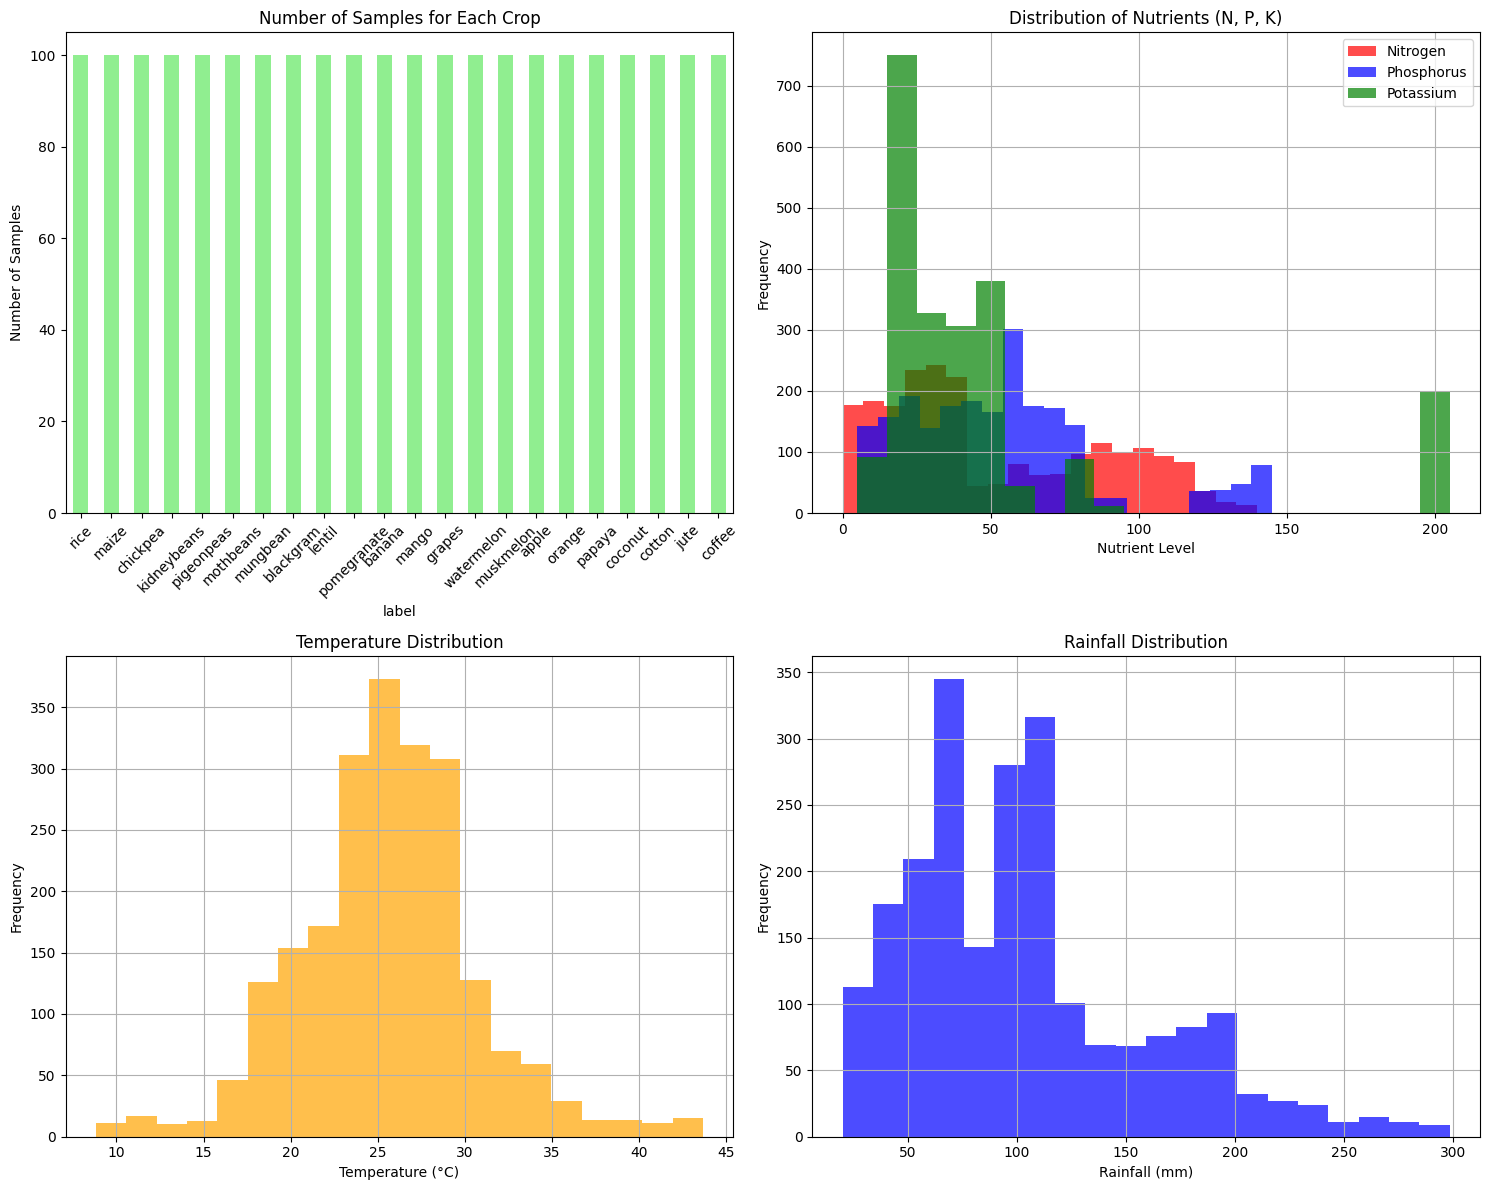

In [78]:
# Chart 1: Crop Distribution
plt.figure(figsize=(15, 12)) 
# Plot 1: Bar chart of crops
plt.subplot(2, 2, 1)
crop_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Samples for Each Crop')
plt.xticks(rotation=45)
plt.ylabel('Number of Samples')
# Plot 2: What nutrients look like
plt.subplot(2, 2, 2)
df['N'].hist(bins=20, color='red', alpha=0.7, label='Nitrogen')
df['P'].hist(bins=20, color='blue', alpha=0.7, label='Phosphorus')
df['K'].hist(bins=20, color='green', alpha=0.7, label='Potassium')
plt.title('Distribution of Nutrients (N, P, K)')
plt.xlabel('Nutrient Level')
plt.ylabel('Frequency')
plt.legend()
# Plot 3: Weather conditions
plt.subplot(2, 2, 3)
df['temperature'].hist(bins=20, color='orange', alpha=0.7)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Plot 4: Rainfall
plt.subplot(2, 2, 4)
df['rainfall'].hist(bins=20, color='blue', alpha=0.7)
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




🌡️ STEP 6: How different crops need different conditions...


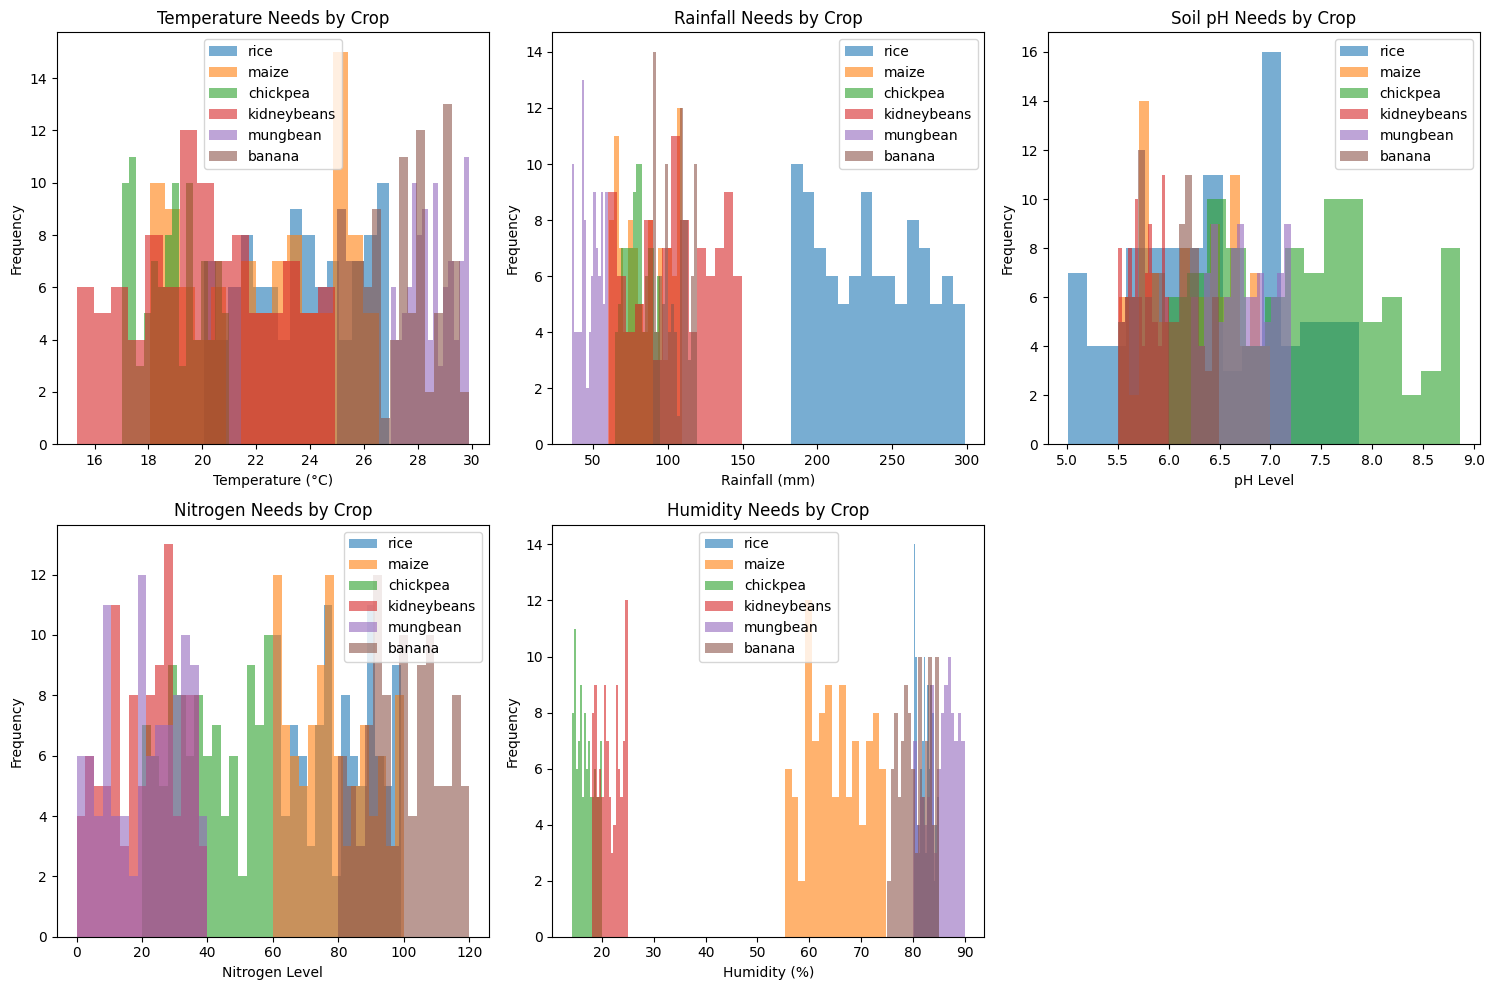

In [79]:
# See How Different Crops Need Different Conditions
print("\n🌡️ STEP 6: How different crops need different conditions...")

# Let's look at 6 common crops
common_crops = ['rice', 'maize', 'chickpea', 'kidneybeans', 'mungbean', 'banana']

plt.figure(figsize=(15, 10))

# Plot 1: Temperature requirements
plt.subplot(2, 3, 1)
for crop in common_crops:
    crop_data = df[df['label'] == crop]
    plt.hist(crop_data['temperature'], alpha=0.6, label=crop, bins=15)
plt.title('Temperature Needs by Crop')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()

# Plot 2: Rainfall requirements
plt.subplot(2, 3, 2)
for crop in common_crops:
    crop_data = df[df['label'] == crop]
    plt.hist(crop_data['rainfall'], alpha=0.6, label=crop, bins=15)
plt.title('Rainfall Needs by Crop')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.legend()

# Plot 3: pH requirements
plt.subplot(2, 3, 3)
for crop in common_crops:
    crop_data = df[df['label'] == crop]
    plt.hist(crop_data['ph'], alpha=0.6, label=crop, bins=15)
plt.title('Soil pH Needs by Crop')
plt.xlabel('pH Level')
plt.ylabel('Frequency')
plt.legend()

# Plot 4: Nitrogen needs
plt.subplot(2, 3, 4)
for crop in common_crops:
    crop_data = df[df['label'] == crop]
    plt.hist(crop_data['N'], alpha=0.6, label=crop, bins=15)
plt.title('Nitrogen Needs by Crop')
plt.xlabel('Nitrogen Level')
plt.ylabel('Frequency')
plt.legend()

# Plot 5: Humidity needs
plt.subplot(2, 3, 5)
for crop in common_crops:
    crop_data = df[df['label'] == crop]
    plt.hist(crop_data['humidity'], alpha=0.6, label=crop, bins=15)
plt.title('Humidity Needs by Crop')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


📊 STEP 7: Comparing crops side by side...


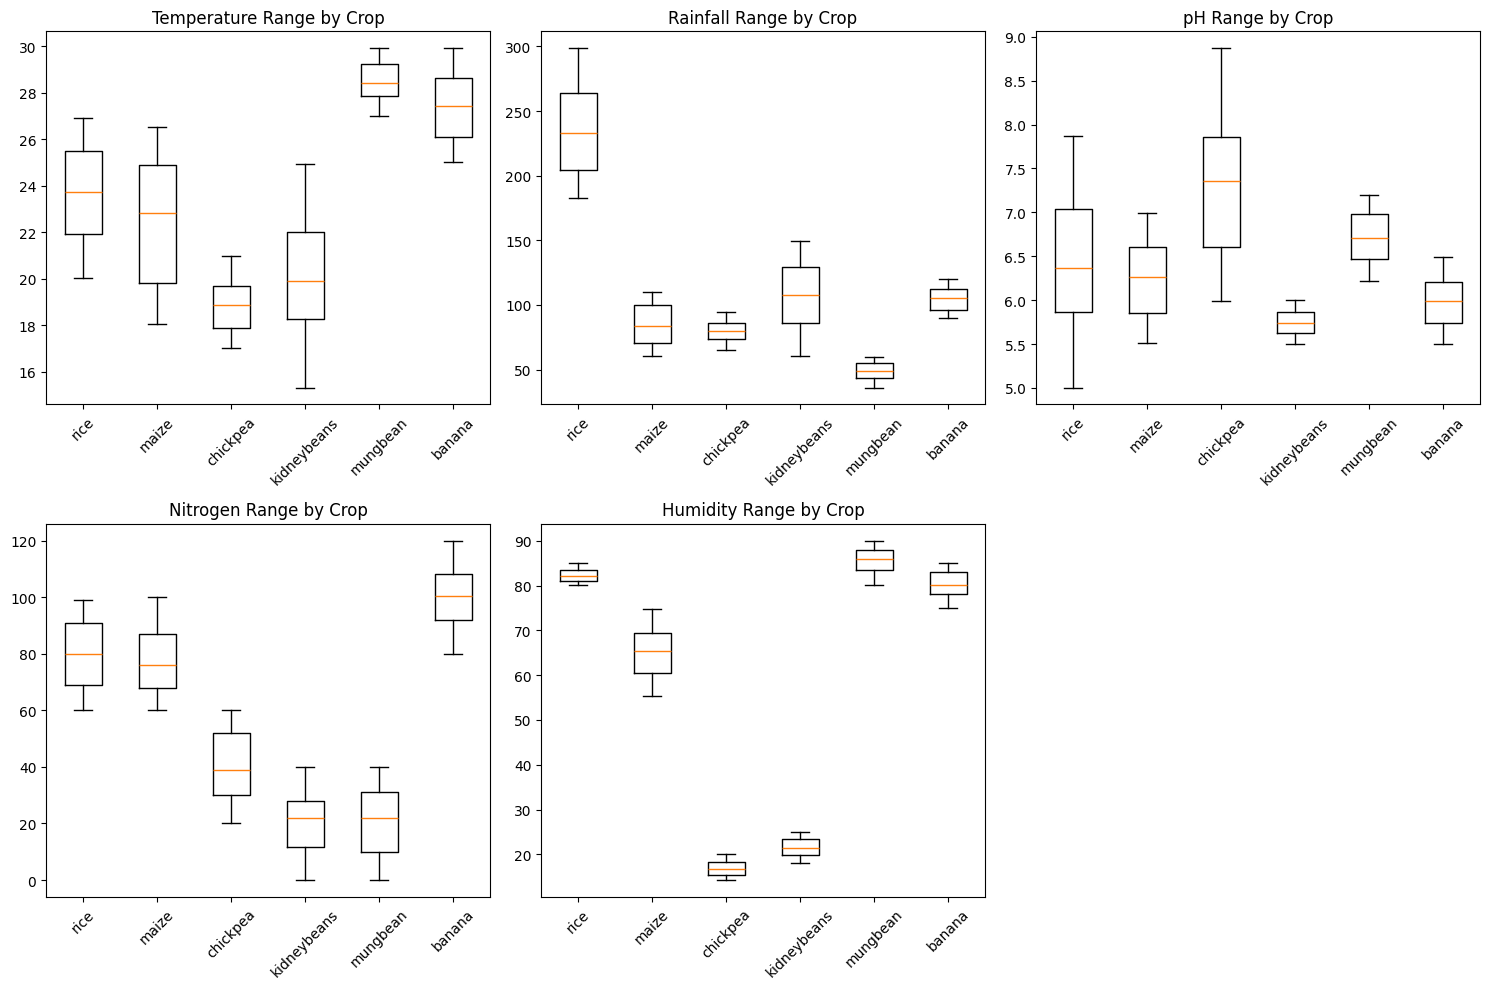

In [80]:
#Compare Crops Side by Side
print("\n📊 STEP 7: Comparing crops side by side...")

plt.figure(figsize=(15, 10))

# Create box plots to compare crops
plt.subplot(2, 3, 1)
box_data = [df[df['label'] == crop]['temperature'] for crop in common_crops]
plt.boxplot(box_data, labels=common_crops)
plt.title('Temperature Range by Crop')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
box_data = [df[df['label'] == crop]['rainfall'] for crop in common_crops]
plt.boxplot(box_data, labels=common_crops)
plt.title('Rainfall Range by Crop')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
box_data = [df[df['label'] == crop]['ph'] for crop in common_crops]
plt.boxplot(box_data, labels=common_crops)
plt.title('pH Range by Crop')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
box_data = [df[df['label'] == crop]['N'] for crop in common_crops]
plt.boxplot(box_data, labels=common_crops)
plt.title('Nitrogen Range by Crop')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
box_data = [df[df['label'] == crop]['humidity'] for crop in common_crops]
plt.boxplot(box_data, labels=common_crops)
plt.title('Humidity Range by Crop')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


🔗 STEP 8: How are different features related?


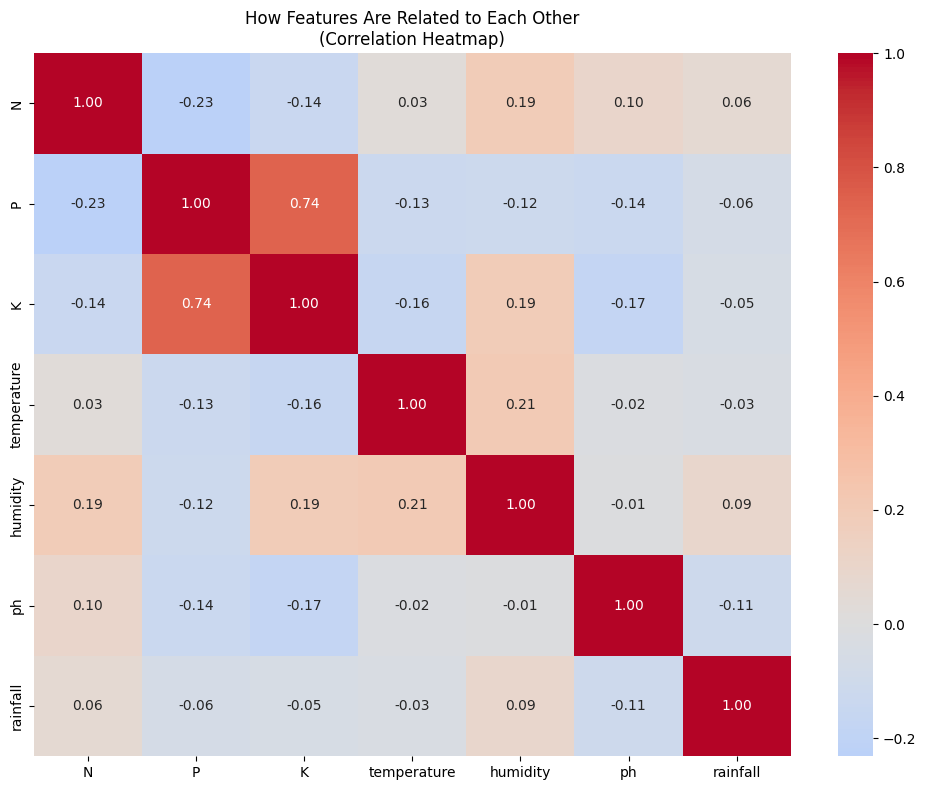


 What correlation means:
   • +1.0: Perfect positive relationship
   •  0.0: No relationship
   • -1.0: Perfect negative relationship
   • Most values near 0: Features are mostly independent


In [81]:
#See How Features Are Related
print("\n🔗 STEP 8: How are different features related?")

# Select only numerical columns for correlation
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('How Features Are Related to Each Other\n(Correlation Heatmap)')
plt.tight_layout()
plt.show()

print("\n What correlation means:")
print("   • +1.0: Perfect positive relationship")
print("   •  0.0: No relationship") 
print("   • -1.0: Perfect negative relationship")
print("   • Most values near 0: Features are mostly independent")

In [82]:
# Show Some Interesting Examples
print("\n Some interesting examples...")

print("\n Let's look at some specific crops:")

# Rice example
rice_data = df[df['label'] == 'rice']
print(f"\n RICE growing conditions:")
print(f"   Temperature: {rice_data['temperature'].mean():.1f}°C on average")
print(f"   Rainfall: {rice_data['rainfall'].mean():.1f}mm on average")
print(f"   Humidity: {rice_data['humidity'].mean():.1f}% on average")

# Maize example  
maize_data = df[df['label'] == 'maize']
print(f"\n🌽 MAIZE growing conditions:")
print(f"   Temperature: {maize_data['temperature'].mean():.1f}°C on average")
print(f"   Rainfall: {maize_data['rainfall'].mean():.1f}mm on average")
print(f"   Humidity: {maize_data['humidity'].mean():.1f}% on average")

# Chickpea example
chickpea_data = df[df['label'] == 'chickpea']
print(f"\n🥜 CHICKPEA growing conditions:")
print(f"   Temperature: {chickpea_data['temperature'].mean():.1f}°C on average")
print(f"   Rainfall: {chickpea_data['rainfall'].mean():.1f}mm on average")
print(f"   Humidity: {chickpea_data['humidity'].mean():.1f}% on average")


 Some interesting examples...

 Let's look at some specific crops:

 RICE growing conditions:
   Temperature: 23.7°C on average
   Rainfall: 236.2mm on average
   Humidity: 82.3% on average

🌽 MAIZE growing conditions:
   Temperature: 22.4°C on average
   Rainfall: 84.8mm on average
   Humidity: 65.1% on average

🥜 CHICKPEA growing conditions:
   Temperature: 18.9°C on average
   Rainfall: 80.1mm on average
   Humidity: 16.9% on average


In [83]:


print("\n📝 STEP 10: Summary of what we learned...")

print("\n🎓 KEY FINDINGS:")
print("1. 📊 We have 22 different crops, 100 samples each")
print("2. ✅ No missing data - great for machine learning")
print("3. 🌡️ Different crops need different temperatures")
print("4. 💧 Rainfall requirements vary a lot between crops") 
print("5. 🌱 Soil pH preferences are different for each crop")
print("6. 🔗 Most features don't strongly relate to each other")
print("7. 📈 Nutrient levels (N, P, K) vary across crops")

print("\n💡 WHAT THIS MEANS FOR MACHINE LEARNING:")
print("   • Good balanced dataset for training")
print("   • No data cleaning needed")
print("   • All features can be useful for prediction")
print("   • We can build a accurate crop recommendation system")

print("\n🚀 NEXT STEPS:")
print("   1. Use this data to train a machine learning model")
print("   2. The model will learn patterns from these examples")
print("   3. Then predict the best crop for new conditions")

print("\n" + "=" * 50)
print("🎉 EDA COMPLETED! Ready for machine learning!")
print("=" * 50)


📝 STEP 10: Summary of what we learned...

🎓 KEY FINDINGS:
1. 📊 We have 22 different crops, 100 samples each
2. ✅ No missing data - great for machine learning
3. 🌡️ Different crops need different temperatures
4. 💧 Rainfall requirements vary a lot between crops
5. 🌱 Soil pH preferences are different for each crop
6. 🔗 Most features don't strongly relate to each other
7. 📈 Nutrient levels (N, P, K) vary across crops

💡 WHAT THIS MEANS FOR MACHINE LEARNING:
   • Good balanced dataset for training
   • No data cleaning needed
   • All features can be useful for prediction
   • We can build a accurate crop recommendation system

🚀 NEXT STEPS:
   1. Use this data to train a machine learning model
   2. The model will learn patterns from these examples
   3. Then predict the best crop for new conditions

🎉 EDA COMPLETED! Ready for machine learning!



# STEP 4: FEATURE ENGINEERING



In [84]:

# STEP 4: FEATURE ENGINEERING
# Adding new features can help models perform better
df['growing_season_index'] = df['temperature'] * df['humidity'] / 100
df['npk_balance'] = df['N'] / (df['P'] + df['K'] + 1e-5)  # Avoid divide by zero
df['temp_humidity_interaction'] = df['temperature'] * df['humidity']
df['rainfall_efficiency'] = df['rainfall'] / (df['temperature'] + 1e-5)

print("\n✅ Feature engineering done. New columns added:")
print(df[['growing_season_index', 'npk_balance', 
          'temp_humidity_interaction', 'rainfall_efficiency']].head())


✅ Feature engineering done. New columns added:
   growing_season_index  npk_balance  temp_humidity_interaction  \
0             17.121963     1.058823                1712.196283   
1             17.485957     0.858586                1748.595734   
2             18.937446     0.606061                1893.744627   
3             21.234829     0.986667                2123.482908   
4             16.427204     0.928571                1642.720357   

   rainfall_efficiency  
0             9.719250  
1            10.411145  
2            11.474477  
3             9.167757  
4            13.050915  


#  PREPARE FEATURES AND TARGET

In [85]:
#  PREPARE FEATURES AND TARGET
# Features (all columns except 'label') and target (crop type)
X = df.drop('label', axis=1)
y = df['label']

print(f"Features: {list(X.columns)}")
print(f"Target: Crop type")


Features: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'growing_season_index', 'npk_balance', 'temp_humidity_interaction', 'rainfall_efficiency']
Target: Crop type


In [86]:
# Encode target variable (crop names -> numbers)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("\nCrop encoding:")
for i, crop in enumerate(le.classes_):
    print(f"   {crop} → {i}")


# Scale numerical features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nFeatures and target prepared.")



Crop encoding:
   apple → 0
   banana → 1
   blackgram → 2
   chickpea → 3
   coconut → 4
   coffee → 5
   cotton → 6
   grapes → 7
   jute → 8
   kidneybeans → 9
   lentil → 10
   maize → 11
   mango → 12
   mothbeans → 13
   mungbean → 14
   muskmelon → 15
   orange → 16
   papaya → 17
   pigeonpeas → 18
   pomegranate → 19
   rice → 20
   watermelon → 21

Features and target prepared.


# SPLIT DATA INTO TRAIN AND TEST SETS

In [87]:

# STEP 6
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)



Training set size: (1760, 11)
Testing set size: (440, 11)


# 

In [88]:

# STEP 7
# INITIALIZE MODELS
print("\n Initializing models...")

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
xgb_model = xgb.XGBClassifier(
    n_estimators=100, max_depth=6, learning_rate=0.1,
    objective='multi:softprob', random_state=42
)
lgb_model = lgb.LGBMClassifier(
    n_estimators=100, max_depth=6, learning_rate=0.1,
    objective='multiclass', random_state=42
)

models = {
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "LightGBM": lgb_model
}

print("✅ Models initialized!")



 Initializing models...
✅ Models initialized!


# TRAIN AND EVALUATE MODELS

In [89]:
results = {}

for name, model in models.items():
    print(f"\n Training {name}...")
    
    # Fit model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        "model": model,
        "accuracy": acc,
        "predictions": y_pred
    }
    
    print(f"✅ {name} Accuracy: {acc*100:.2f}%")



 Training Random Forest...
✅ Random Forest Accuracy: 99.32%

 Training XGBoost...
✅ XGBoost Accuracy: 99.55%

 Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2352
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 11
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start train

# Evaluation of all models


 Model Evaluation Results:

--- Random Forest ---
 Accuracy: 99.32%
RMSE: 0.92
 R² Score: 0.98

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.91      1.00      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon   

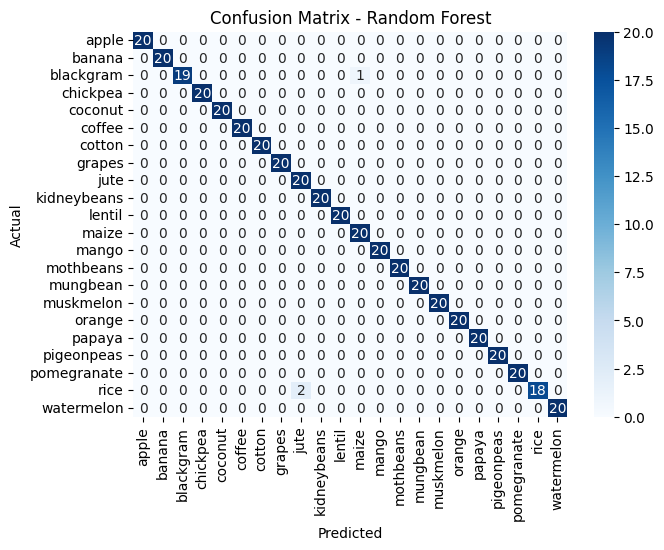


--- XGBoost ---
 Accuracy: 99.55%
RMSE: 0.78
 R² Score: 0.99

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       1.00      1.00      1.00        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.95      0.97        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00      

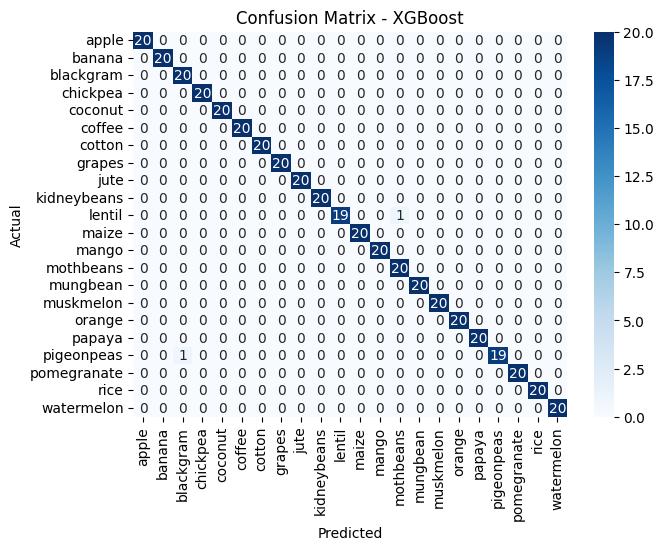


--- LightGBM ---
 Accuracy: 99.32%
RMSE: 0.96
 R² Score: 0.98

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.95      0.97        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00     

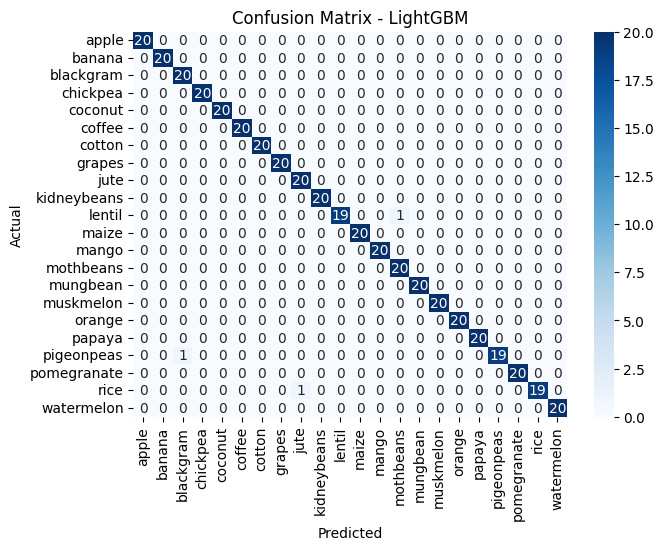

In [90]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

print("\n Model Evaluation Results:")

for name, res in results.items():
    model = res["model"]
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"\n--- {name} ---")
    print(f" Accuracy: {acc*100:.2f}%")
    
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE: {rmse:.2f}")
    
    # R² Score
    r2 = r2_score(y_test, y_pred)
    print(f" R² Score: {r2:.2f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
